## **ALY6015_SpringA2020_Team#1Hackathon#1**

<b>Author:</b> Pragati Koladiya,Tanvi Bhagat, Munitha Priyanka

<b>Purpose:</b> Hackathon#1

In [0]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTCR9XywVPKKyJtV5w0HU9euTEd1GkBVaogXW1jrWd38gCyoUMP3YaJpFVvbo15ucm6ahRLU8tWn4Ps/pub?gid=510704774&single=true&output=csv"
#df = pd.read_csv(data_path,index_col="Id")
realestate_sbst_raw = pd.read_csv(data_path)
realestate_sbst_raw

,Id,SF,SalePrice
0,1,4316,755000
1,2,4476,745000
2,3,3627,625000
3,4,2364,611657
4,5,2822,582933
...,...,...,...
1455,1456,1317,40000
1456,1457,334,39300
1457,1458,968,37900
1458,1459,480,35311


In [0]:
realestate_sbst = realestate_sbst_raw.copy()
realestate_sbst = realestate_sbst.set_index(['Id'])

starting_percentile = realestate_sbst['SalePrice'].quantile(.01)
ending_percentile = realestate_sbst['SalePrice'].quantile(.99)
realestate_sbst_outliers_df = realestate_sbst.loc[((realestate_sbst['SalePrice'] <= starting_percentile) | (realestate_sbst['SalePrice'] >= ending_percentile))]
realestate_sbst = realestate_sbst.loc[((realestate_sbst['SalePrice'] > starting_percentile) & (realestate_sbst['SalePrice'] < ending_percentile))]
realestate_sbst = realestate_sbst.loc[(realestate_sbst['SF'] !=0 )]

#print(realestate_sbst_outliers_df)
realestate_sbst

,SF,SalePrice
Id,,
16,1976,440000
17,2945,438780
18,2728,437154
19,3228,430000
20,2332,426000
...,...,...
1441,1077,67000
1442,864,67000
1443,1131,66500


<h1>Q1. What does the distribution of rents look like?</h1>


In [0]:
realestate_sbst.describe()

,SF,SalePrice
count,1426.000000,1426.000000
mean,1501.215288,178363.830996
std,494.342946,68661.193227
min,520.000000,62383.000000
25%,1126.000000,130000.000000
50%,1458.000000,163000.000000
75%,1768.000000,212975.000000
max,5642.000000,440000.000000


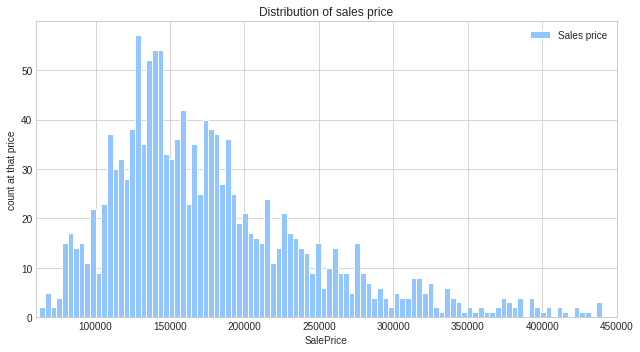

In [0]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
fig 
x = [realestate_sbst['SalePrice']]

sal_data = axs.hist(x, bins = 100, histtype='bar',label = ['Sales price'])
axs.set_title('Distribution of sales price')
axs.set_xlabel('SalePrice')
axs.set_ylabel('count at that price')
axs.set_xlim(60000,450000)
axs.legend(prop={'size': 10})
fig.set_size_inches(9, 5)
plt.show()

<h1>=> The distribution is right skewed </h1>

<h1>Q2. Provide an estimate cost for a house with 1000 sq ft.</h1>


In [0]:
from scipy import stats
regression_data = stats.linregress(realestate_sbst.SF,realestate_sbst.SalePrice)
regression_data

LinregressResult(slope=94.5823178478498, intercept=36375.40951375806, rvalue=0.6809683814514425, pvalue=6.6014579545306374e-195, stderr=2.6954088289516096)

In [0]:
SF_array = range(10,6000)
lin_reg = LinearRegression()


 
 bases on the regression result estimate_SalePrice of 1000 is : $  130957.72736160785 




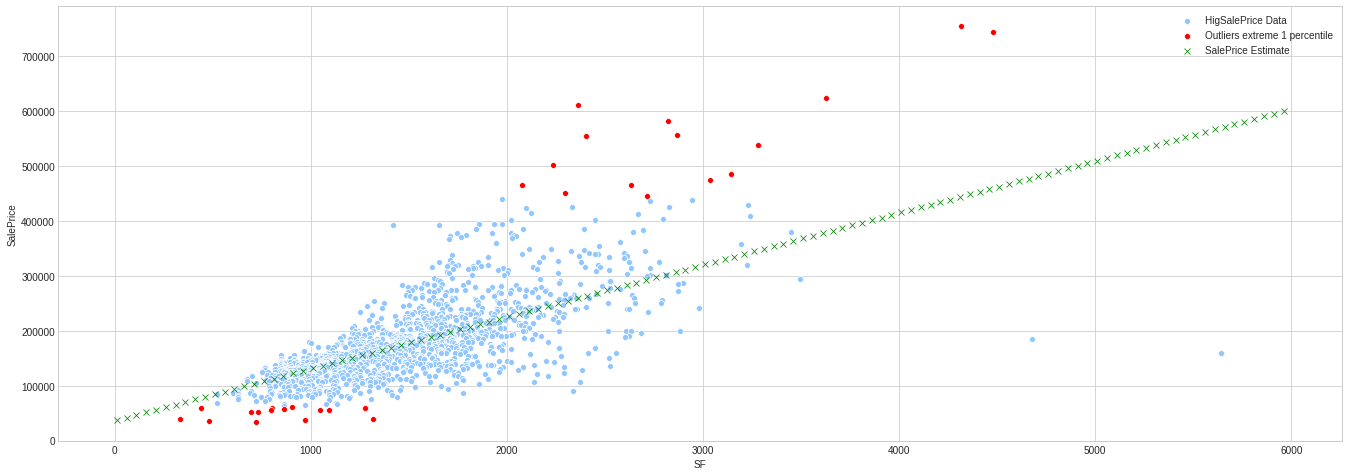

In [0]:
# regression curve   SalePrice = (slope*SF)  intercept
SF_array = range(10,6000,50)
estimate_SalePrice =( regression_data.slope *SF_array) + regression_data.intercept

Sq_ft = 1000 
estimate_SalePrice_x =( regression_data.slope *Sq_ft) + regression_data.intercept
print('\n \n bases on the regression result estimate_SalePrice of' , Sq_ft , 'is : $ ',estimate_SalePrice_x, '\n\n' )

sns.scatterplot(realestate_sbst.SF,realestate_sbst.SalePrice,label='HigSalePrice Data')
sns.scatterplot(realestate_sbst_outliers_df.SF,realestate_sbst_outliers_df.SalePrice,color = 'r', marker="o", label='Outliers extreme 1 percentile')
sns.scatterplot(SF_array,estimate_SalePrice,color = 'g', marker="x", label='SalePrice Estimate')

<h1>Q3. How much sq. footage can $1,000,000 buy?</h1>

In [0]:
regression_data_SF = stats.linregress(realestate_sbst.SalePrice,realestate_sbst.SF)
regression_data_SF

LinregressResult(slope=0.004902797341914997, intercept=626.7335710175847, rvalue=0.6809683814514425, pvalue=6.6014579545306374e-195, stderr=0.00013972001894917182)


 
 bases on the regression result estimate_SF for $ 1000000 is :   5529.5309129325815 sq ft




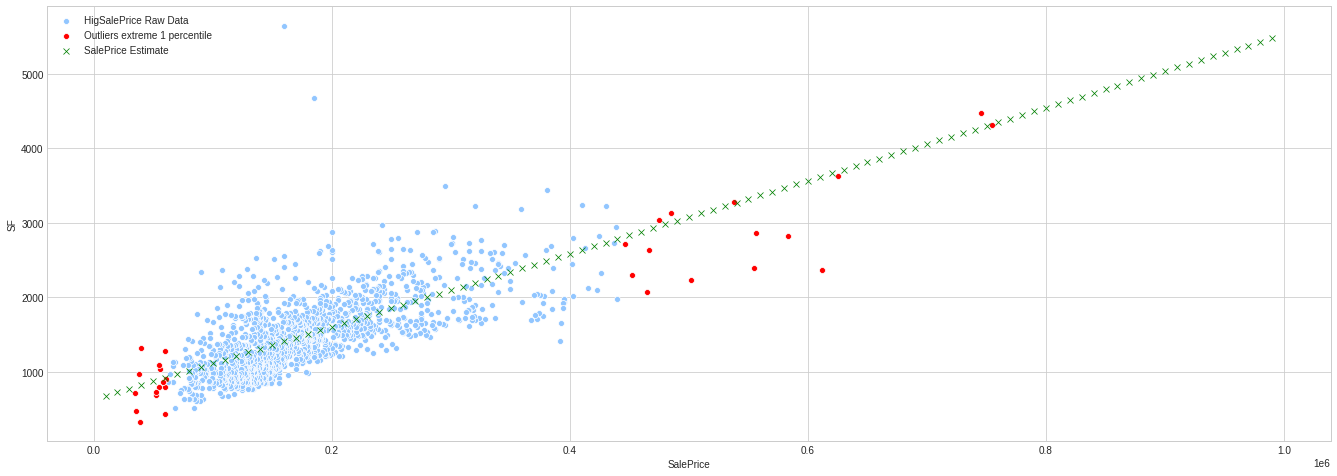

In [0]:
Sale_price_array = range(10000,1000000,10000)
estimate_SF =( regression_data_SF.slope *Sale_price_array) + regression_data_SF.intercept

Sale_price_x = 1000000
estimate_SF_x =( regression_data_SF.slope *Sale_price_x) + regression_data_SF.intercept
print('\n \n bases on the regression result estimate_SF for $' , Sale_price_x , 'is :  ',estimate_SF_x, 'sq ft\n\n' )


sns.scatterplot(realestate_sbst.SalePrice, realestate_sbst.SF, label='HigSalePrice Raw Data')
sns.scatterplot(realestate_sbst_outliers_df.SalePrice,realestate_sbst_outliers_df.SF,color = 'r', marker="o", label='Outliers extreme 1 percentile')
sns.scatterplot(Sale_price_array,estimate_SF,color = 'g', marker="x", label='SalePrice Estimate')


<h1>Q4. What is your interpretation of the prices for houses in the 4000-5000 sq. footage range?</h1>

<b>House prices between 4000-5000 sq.footage range:</b>
<ul>
    <li>The two points in the range 4000-5000 sq. foot are classified as outliers. The third point is not classified as an outlier in the given range, it is relatively under priced. Since the price is very low with respect to the square foot range, we need other factors that need to be considered for making a concrete decision. </li>
    <li>We need to identify the cause of these outliers and look out for data entry or valuation errors. We need to identify the cause of these outliers and look out for data entry or valuation errors. The presence of additional features and/or data records may also help us in identifying the cause for those outliers.</li>
</ul>